# Use ONNX ResNet

 
 In this notebook, we investigate how to use the [ResNet](https://arxiv.org/abs/1512.03385) computer vision model serialized in  [ONNX](https://onnx.ai/) format. For performing this experiment, we selected the "animal" dataset, which contains images of cute dogs and cats.

## Setup Environment

But before we start, let's set up our working environment. It will help us to keep the project directory clean. All artifacts generated within the project will be placed to the "tmp" dir and will be ignored by Git.

In [1]:
# Let's make a temporary directory for all artifacts created by this notebook.
import os
if not os.path.exists('tmp'):
    os.makedirs('tmp')

## Prepare Dataset

For creating the ML model we are loading the "animal" dataset which includes the following images:

| Photo           | Description                  |
| ----------------| ---------------------------- |
| cat-1.jpeg      | an image of a cat            |
| cat-2.jpeg      | an image of a cat            |
| cat-3.jpeg      | an image of a cat            |
| cat-m.jpeg      | an image of 5 cats           |
| dog-1.jpeg      | an image of a dog            |
| dog-2.jpeg      | an image of a dog            |
| dog-3.jpeg      | an image of a dog            |
| dog-m.jpeg      | an image of 3 dogs           |
| dog-n-cat.jpeg  | an image of 2 cats and 1 dog |

Please note, this data set is used for inference experiments only.

In [2]:
import numpy as np
from utils import load_dataset

# Sets the loading dataset name.
dataset_name = 'animal'

# Loads the dataset.
dataset = load_dataset(dataset_name)


## Download ResNet ONNX Model

Use the following [page](https://github.com/onnx/models/tree/master/vision/classification/resnet) to get the URL for the ResNet ONNX model. The current URL belongs to the ResNet18.

**Please note that downloading ONNX models have a large size. To prevent the repeated download of the same model on the notebook restart we check whether the model already exists. If a model exists we skip the download. To force download, go to the "tmp" directory and delete the "resnet.onnx" file.**

In [3]:
if not os.path.exists(os.path.join('tmp', 'resnet.onnx')):
    !wget -O tmp/resnet.onnx https://github.com/onnx/models/raw/master/vision/classification/resnet/model/resnet18-v1-7.onnx 
                      

## Define Image Preprocessor

Before using Resnet, we need to preprocess the images using the predefined function.

In [4]:
def preprocess(img_data):
    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])

    norm_img_data = np.zeros(img_data.shape).astype('float32')

    for i in range(img_data.shape[0]):
         # for each pixel in each channel, divide the value by 255 to get value between [0, 1] and then normalize
        norm_img_data[i,:,:] = (img_data[i,:,:]/255 - mean_vec[i]) / stddev_vec[i]
    return norm_img_data

## Score Images

First we need to load the model.

In [5]:
from matplotlib import pyplot as plt
from utils import load_image
import onnxruntime as rt

sess = rt.InferenceSession(os.path.join('tmp', 'resnet.onnx'))

### Predict Cat

Load the cat image and resize it to [224, 224].

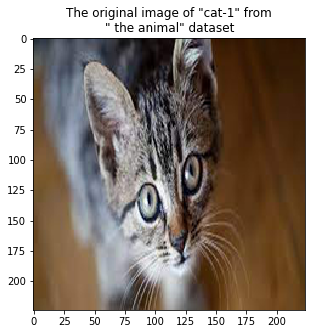

In [6]:
image_name = 'cat-1'
cat_image = load_image(dataset_name, image_name, (224,224))

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(cat_image, interpolation='nearest')
ax.set_title( f'The original image of "{image_name}" from\n" the {dataset_name}" dataset' )

plt.savefig(os.path.join('tmp', f'resnet_orig_{image_name.replace("-","_")}.jpg'))
plt.show()

Preprocess image for the Resnet input.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


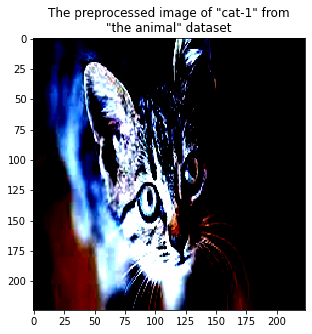

In [7]:
norm_cat_image = preprocess(cat_image.transpose(2,0,1))

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(norm_cat_image.transpose(1,2,0), interpolation='nearest')
ax.set_title( f'The preprocessed image of "{image_name}" from\n"the {dataset_name}" dataset' )

plt.savefig(os.path.join('tmp', f'resnet_prep_{image_name.replace("-","_")}.jpg'))
plt.show()

Use ONNX model for scoring.

In [8]:
scores = sess.run(None, {sess.get_inputs()[0].name: [norm_cat_image]})[0][0]
idx = np.argmax(scores)
score = scores[idx]
label = dataset.schema.labels[idx] 
print('ResNet Model predicted "%s" with %.2f score;' % (label, score))

ResNet Model predicted "tabby, tabby cat" with 12.97 score;


### Predict Dog

Load the dog image and resize it to [224, 224].

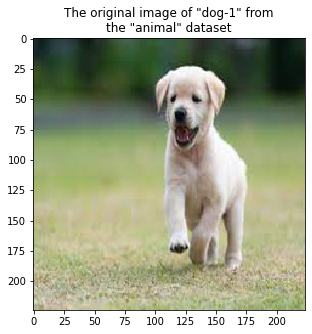

In [9]:
image_name = 'dog-1'
dog_image = load_image(dataset_name, image_name, (224,224))

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(dog_image, interpolation='nearest')
ax.set_title( f'The original image of "{image_name}" from\nthe "{dataset_name}" dataset' )

plt.savefig(os.path.join('tmp', f'resnet_orig_{image_name.replace("-","_")}.jpg'))
plt.show()

Preprocess image for the Resnet input.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


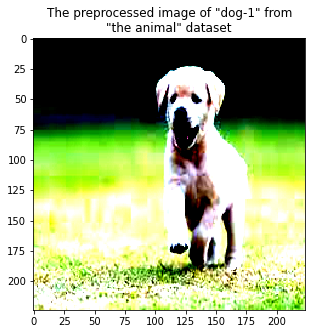

In [10]:
norm_dog_image = preprocess(dog_image.transpose(2,0,1))

fig, ax = plt.subplots(figsize=(5,5))
plt.imshow(norm_dog_image.transpose(1,2,0), interpolation='nearest')
ax.set_title( f'The preprocessed image of "{image_name}" from\n"the {dataset_name}" dataset' )

plt.savefig(os.path.join('tmp', f'resnet_prep_{image_name.replace("-","_")}.jpg'))
plt.show()

Use ONNX model for scoring.

In [11]:
scores = sess.run(None, {sess.get_inputs()[0].name: [norm_dog_image]})[0][0]
idx = np.argmax(scores)
score = scores[idx]
label = dataset.schema.labels[idx] 
print('ResNet Model predicted "%s" with %.2f score;' % (label, score))

ResNet Model predicted "Labrador retriever" with 14.60 score;
